In [54]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pytz

In [3]:
SSL_VERIFY=False

In [5]:
# list all counters from API
r = requests.get(
    'https://www.startupuniverse.ch/api/1.0/de/counters/list',
    params={'page': 1},
    verify=SSL_VERIFY)
r.json()

C:\Users\sszods\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'response': {'data': [{'id': 265,
    'name': '',
    'slug': 'c5ede605955b2d',
    'company': {'id': 1407, 'name': ''}},
   {'id': 278,
    'name': '',
    'slug': 'c5ee3b633ef5e7',
    'company': {'id': 1420, 'name': ''}},
   {'id': 285,
    'name': '',
    'slug': 'c5ee5203ab920b',
    'company': {'id': 1427, 'name': ''}},
   {'id': 286,
    'name': '',
    'slug': 'c5ee5de8b29786',
    'company': {'id': 1428, 'name': 'altstätten '}},
   {'id': 287,
    'name': '',
    'slug': 'c5ee5eb572288f',
    'company': {'id': 1429, 'name': 'Geiselweidschwimmbad '}},
   {'id': 290,
    'name': '',
    'slug': 'c5ee746ab9291e',
    'company': {'id': 1432, 'name': ''}},
   {'id': 291,
    'name': '',
    'slug': 'c5ee85bb716a22',
    'company': {'id': 1433, 'name': ''}},
   {'id': 300,
    'name': '',
    'slug': 'c5eee09de74fc7',
    'company': {'id': 1442, 'name': ''}},
   {'id': 301,
    'name': '',
    'slug': 'c5eee0df6982ab',
    'company': {'id': 1443, 'name': ''}},
   {'id': 302,
    'n

In [82]:
# get data from one badi (see https://data.integ.stadt-zuerich.ch/dataset/int_dwh_ssd_badi_zaehler) for all IDs
# Or use https://github.com/opendatazurich/opendatazurich.github.io/blob/master/automation/badi-counter/fetch_from_api.py
# as an alternative. There the slugs used on https://www.stadt-zuerich.ch/ssd/de/index/sport/schwimmen/sommerbaeder.html
# are used to filter the list of counters from above
"""
zh_slugs = [
    'c5ed7c28b7b192',  # Freibad Allenmoos
    'c5ed7c2a3c5fa5',  # Freibad Auhof
    'c5eda072893782',  # Flussbad Au-Höngg
    'c5ed7c2be2e1d1',  # Freibad Heuried
    'c5ed7c330546ea',  # Seebad Katzensee
    'c5eb1917e9eedc',  # Freibad Letzigraben
    'c5ed7c35d2691a',  # Strandbad Mythenquai
    'c5ed7c38a83d5e',  # Flussbad Oberer Letten
    'c5ed7c3a043ac0',  # Freibad Seebach
    'c5ed7c3b370597',  # Frauenbad Stadthausquai
    'c5ed7c3c97c5c1',  # Strandbad Tiefenbrunnen
    'c5ed7c3ecaf50b',  # Flussbad Unterer Letten
    'c5ed7c4013bd69',  # Seebad Utoquai
    'c5ed7c41ae0016',  # Strandbad Wollishofen
    'c5ed7c2d6c3cfb',  # Freibad Zwischen den Hölzern
    'c5ed7c43707dff',  # Hallenbad Bläsi
    'c5ed7c44f09fcd',  # Hallenbad Bungertwies
    'c5eb19118e5824',  # Hallenbad City
    'c5ed7c466505e4',  # Hallenbad Leimbach
    'c5ed7c34806fc3',  # Hallenbad Oerlikon
    'c5ed7c47e86f10',  # Wärmebad Käferberg
]
"""

# Mythenquai = 211
r = requests.get(
    'https://www.startupuniverse.ch/api/1.0/de/counters/get/211',
    verify=SSL_VERIFY)
current_mq = r.json()['response']['data']
current_mq

C:\Users\sszods\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'id': 211,
 'name': 'Freibad Mythenquai',
 'msg': '',
 'slug': 'c5ed7c35d2691a',
 'slug_badi_info': 'https://www.badi-info.ch/Mythenquai.html',
 'mode': 'manual',
 'mode_waiting': 'persons',
 'max': 4009,
 'bookings_enabled': 0,
 'closed': 0,
 'status': 1,
 'logo': None,
 'user_id': 6317,
 'company': {'id': 1353, 'name': '', 'address': '', 'companytype_id': 9},
 'counteritems': [{'id': 532179, 'val': 2198, 'ts_created': 1593010481}],
 'bookings_active': None,
 'counteritems_waiting': [{'id': 493755, 'val': 0, 'ts_created': 1592939881}]}

In [86]:
# get data from last 24h for Mythenquai
timeframe = 60 * 60 * 24 * 3
r = requests.get(
    'https://www.startupuniverse.ch/api/1.0/de/counters/211/items',
    params={'timeframe': timeframe},
    verify=SSL_VERIFY)
hist_mq = r.json()['response']['data']
hist_mq

C:\Users\sszods\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[{'id': 480720,
  'val': 882,
  'ts_created': 1592924084,
  'type': 1,
  'counter_id': 211},
 {'id': 480730,
  'val': 879,
  'ts_created': 1592924094,
  'type': 1,
  'counter_id': 211},
 {'id': 480738,
  'val': 877,
  'ts_created': 1592924103,
  'type': 1,
  'counter_id': 211},
 {'id': 480750,
  'val': 878,
  'ts_created': 1592924111,
  'type': 1,
  'counter_id': 211},
 {'id': 480767,
  'val': 876,
  'ts_created': 1592924129,
  'type': 1,
  'counter_id': 211},
 {'id': 480780,
  'val': 878,
  'ts_created': 1592924142,
  'type': 1,
  'counter_id': 211},
 {'id': 480787,
  'val': 876,
  'ts_created': 1592924150,
  'type': 1,
  'counter_id': 211},
 {'id': 480790,
  'val': 877,
  'ts_created': 1592924153,
  'type': 1,
  'counter_id': 211},
 {'id': 480794,
  'val': 878,
  'ts_created': 1592924159,
  'type': 1,
  'counter_id': 211},
 {'id': 480807,
  'val': 879,
  'ts_created': 1592924167,
  'type': 1,
  'counter_id': 211},
 {'id': 480829,
  'val': 877,
  'ts_created': 1592924184,
  'type': 1,

In [87]:
df = pd.DataFrame(hist_mq)
# convert unix timestamp to datetime
df['date'] = pd.to_datetime(df['ts_created'], unit='s')
df = df.sort_values(by=['date'])
df

,counter_id,id,ts_created,type,val,date
0,211,480720,1592924084,1,882,2020-06-23 14:54:44
1,211,480730,1592924094,1,879,2020-06-23 14:54:54
2,211,480738,1592924103,1,877,2020-06-23 14:55:03
3,211,480750,1592924111,1,878,2020-06-23 14:55:11
4,211,480767,1592924129,1,876,2020-06-23 14:55:29
5,211,480780,1592924142,1,878,2020-06-23 14:55:42
6,211,480787,1592924150,1,876,2020-06-23 14:55:50
7,211,480790,1592924153,1,877,2020-06-23 14:55:53
8,211,480794,1592924159,1,878,2020-06-23 14:55:59
9,211,480807,1592924167,1,879,2020-06-23 14:56:07


In [88]:
# to use different styles, make sure to reload the default to always get clean results
def use_style(style):
    plt.style.use('default')
    plt.style.use(style)

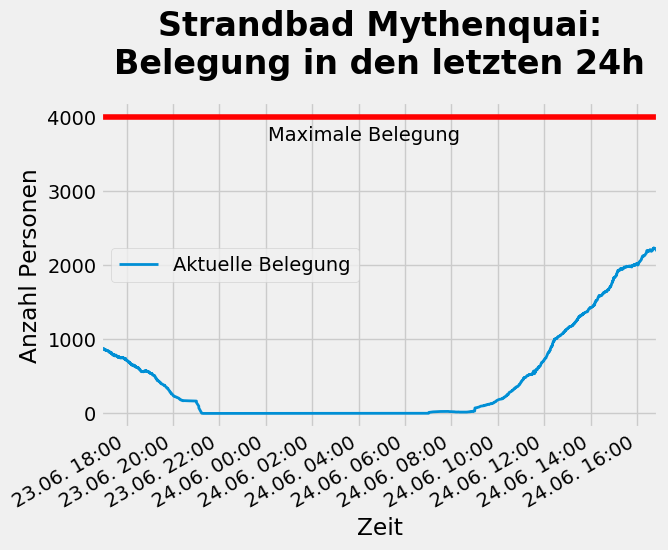

In [98]:
use_style('fivethirtyeight')
fig, ax = plt.subplots()
ax.set_title("Strandbad Mythenquai:\nBelegung in den letzten 24h", fontsize=24, fontweight='bold', pad=20);

df.plot(kind="line", x='date', y='val', ax=ax, linewidth=2, label="Aktuelle Belegung")

# draw red line for maximum occupancy
ax.axhline(y=current_mq['max'], linewidth=4, color='r')
ax.annotate("Maximale Belegung",
            xy=(0.3, 0.88), xycoords='axes fraction',
            xytext=(0.3, 0.88), textcoords='axes fraction',
            )

# add tick every 2h
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

# show date in Zurich timezone
formatter = mdates.DateFormatter('%d.%m. %H:%M')
formatter.set_tzinfo(pytz.timezone('Europe/Zurich'))
ax.xaxis.set_major_formatter(formatter)

# labels
ax.set_ylabel('Anzahl Personen')
ax.set_xlabel('Zeit')

plt.show()

In [ ]:
# TODO: create plot for longer periods of time using the scraped data in https://github.com/opendatazurich/opendatazurich.github.io/blob/master/automation/badi-counter/badi_counter.csv